In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE
from sklearn.preprocessing import power_transform,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [633]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [634]:
df.shape

(1599, 12)

In [635]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [636]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [637]:
df.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
149,8.2,0.400,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5,6
572,10.2,0.240,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.4,5
979,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
346,6.6,0.815,0.02,2.7,0.072,17.0,34.0,0.99550,3.58,0.89,12.3,7
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5
696,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
660,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6


In [638]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [640]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


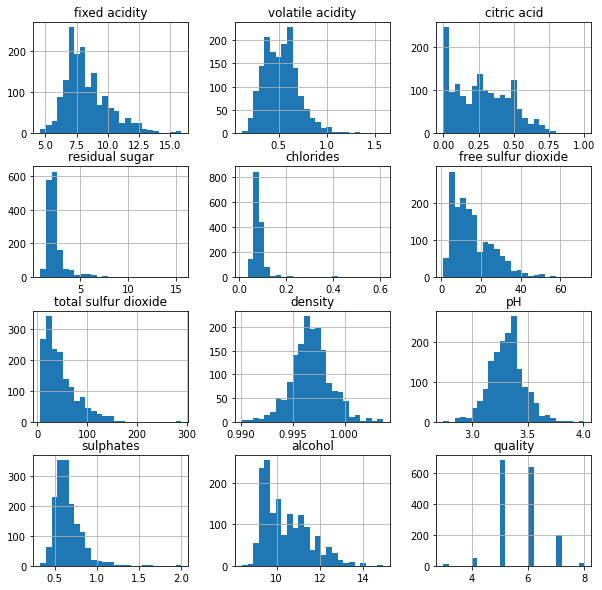

In [641]:
df.hist(bins=25,figsize=(10,10))
plt.show()

<BarContainer object of 1599 artists>

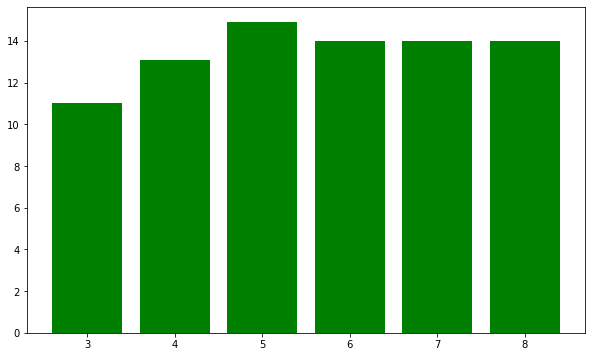

In [642]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='green')

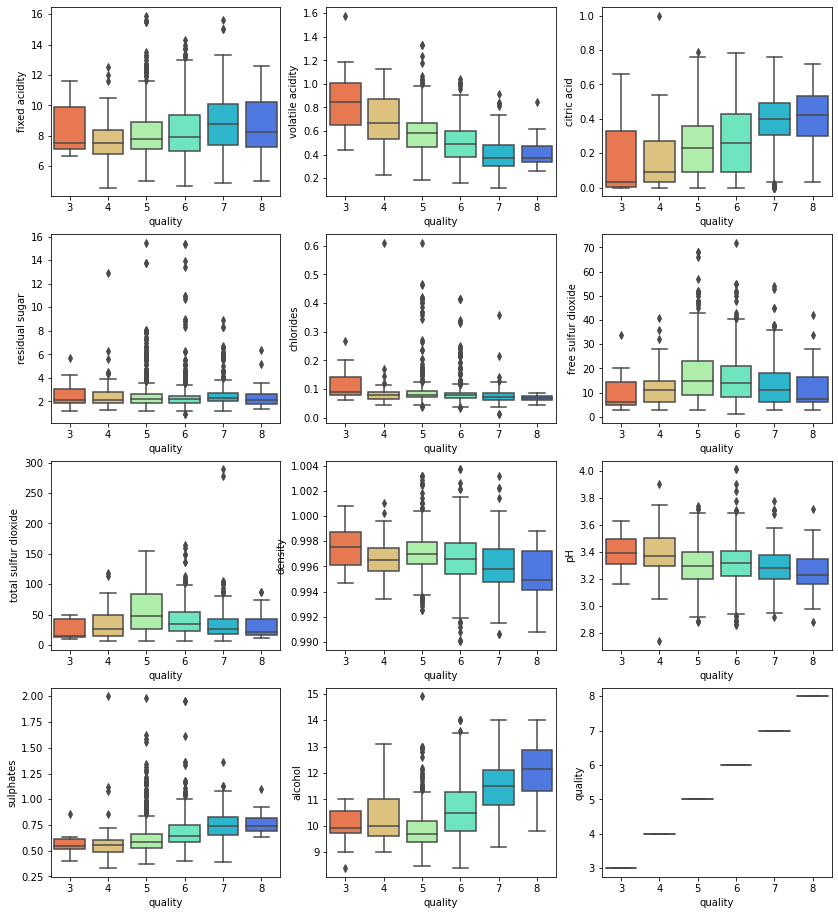

In [643]:
plt.figure(figsize=(14,16))
cols=df.columns
cnt=1
for col in cols:
    plt.subplot(4,3,cnt)
    sns.boxplot(x='quality',y=col,data=df,palette='rainbow_r')
    cnt=cnt+1
plt.show()    

In [644]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

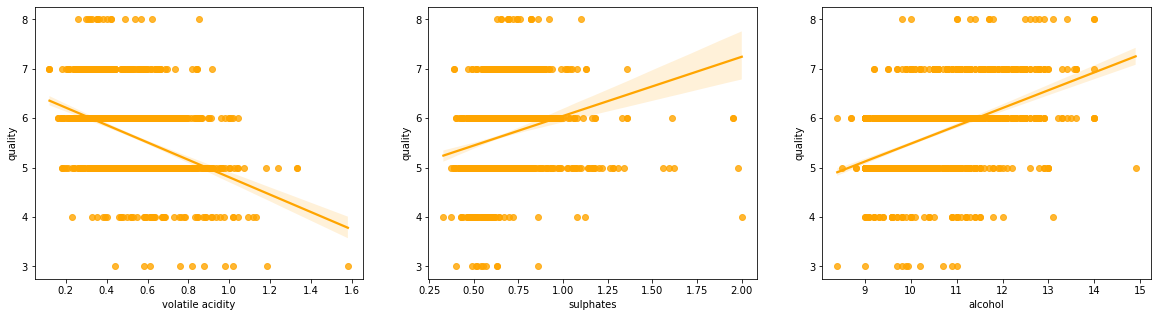

In [645]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
cols=['volatile acidity','sulphates','alcohol']
for col, ax in zip(cols,axs.flat):
    sns.regplot(x=df[col],y=df['quality'],color='orange',ax=ax)

In [646]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

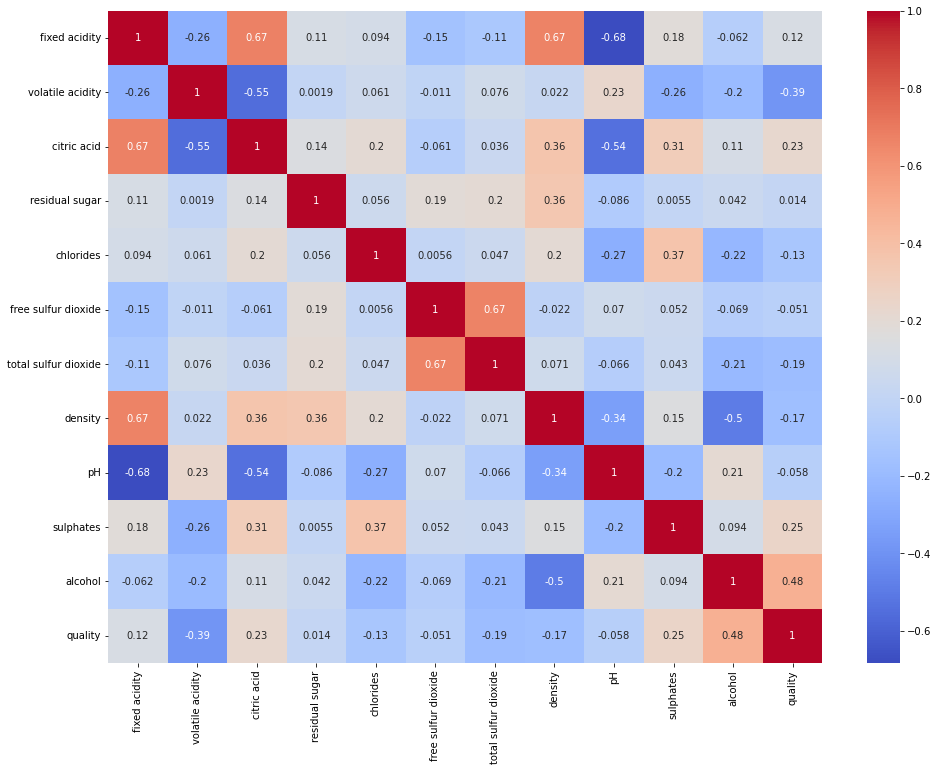

In [647]:
plt.figure(figsize=(16,12))
sns.heatmap(dfcor,annot=True,cmap='coolwarm')

In [648]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.5:
            name = df.corr().columns[a]
            print(name)

citric acid
citric acid
total sulfur dioxide
density
pH
pH


In [649]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [650]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

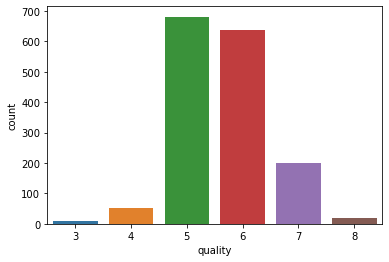

In [651]:
sns.countplot(x='quality',data=df)

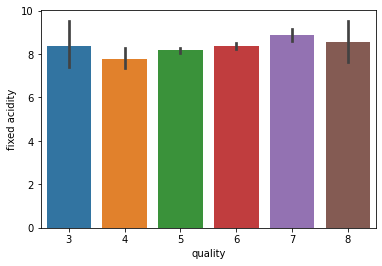

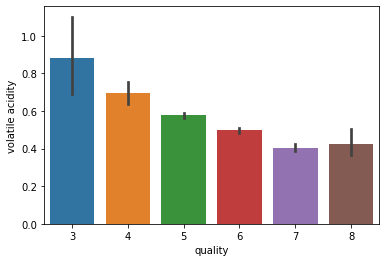

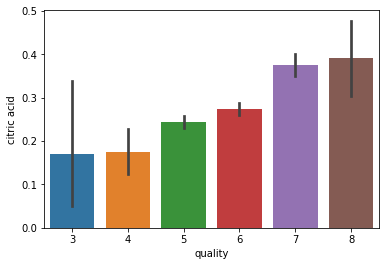

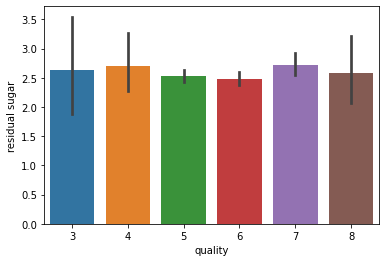

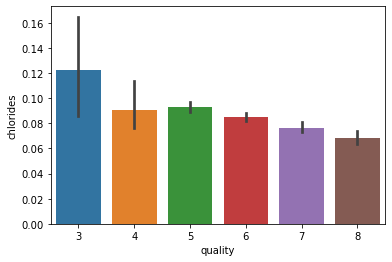

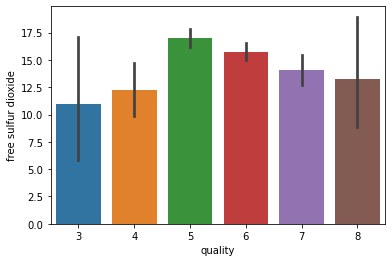

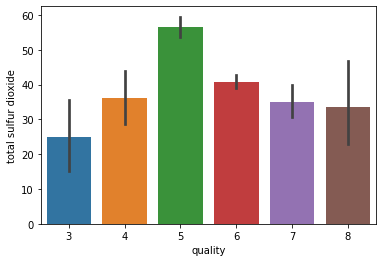

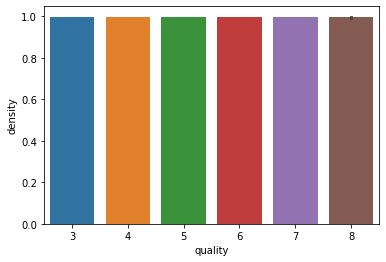

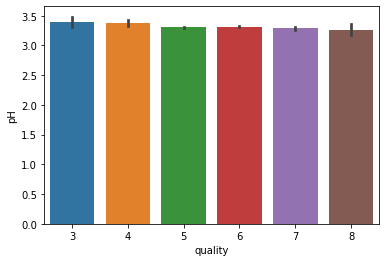

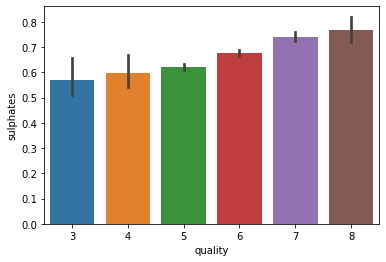

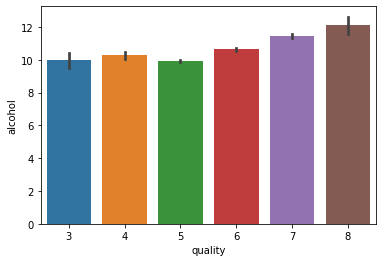

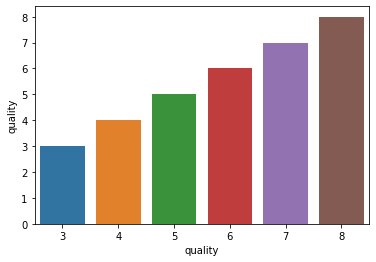

In [652]:
df1=df.select_dtypes([np.int,np.float])
for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality',y=col,data=df1)

In [653]:
bins=(2,6,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [654]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [655]:
le=LabelEncoder()
list1=['quality']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [656]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [657]:
x=df.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [658]:
x.shape

(1599, 11)

In [659]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [660]:
y.shape

(1599,)

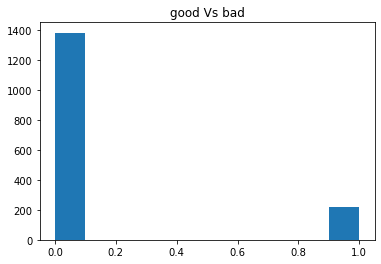

In [661]:
df['quality'].hist(grid=False)
plt.title('good Vs bad')
plt.show()

In [662]:
from collections import Counter
# transform the dataset
sm = SMOTE()
train_x, train_y= sm.fit_resample(x, y)

In [663]:
print('Resampled dataset shape %s' % Counter(train_y))

Resampled dataset shape Counter({0: 1382, 1: 1382})


In [664]:
train_x.shape

(2764, 11)

In [665]:
train_y.shape

(2764,)

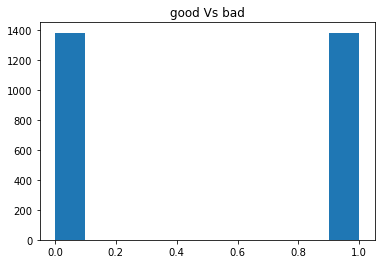

In [666]:
train_y.hist(grid=False)
plt.title('good Vs bad')
plt.show()

In [667]:
train_x.shape

(2764, 11)

In [668]:
train_y.shape

(2764,)

In [669]:
x=np.sqrt(train_x)
x.skew()

fixed acidity           0.375060
volatile acidity        0.411530
citric acid            -0.833453
residual sugar          2.562198
chlorides               3.549195
free sulfur dioxide     0.626383
total sulfur dioxide    0.964933
density                 0.103627
pH                      0.203467
sulphates               0.823540
alcohol                 0.161248
dtype: float64

In [670]:
PowerTransformer()
x_new=power_transform(train_x)

In [671]:
x_new

array([[-0.60407782,  1.32482874, -1.66158804, ...,  1.40865347,
        -0.94883196, -1.40024429],
       [-0.34204527,  1.96913564, -1.66158804, ..., -0.66280439,
         0.02676522, -0.98080442],
       [-0.34204527,  1.56081489, -1.4506189 , ..., -0.23562651,
        -0.1961137 , -0.98080442],
       ...,
       [-0.12415189,  0.31106281,  0.4236211 , ..., -0.20778731,
         0.06999974, -0.27623351],
       [-0.74119194, -0.62503912,  0.71966913, ...,  0.71080417,
         1.08087956,  0.15294041],
       [ 0.89796005,  0.26726894,  1.42854011, ..., -0.84206313,
         0.62520843,  1.27066106]])

In [672]:
type(x_new)

numpy.ndarray

In [673]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [674]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.604078,1.324829,-1.661588,-0.712596,-0.034257,-0.143332,0.108698,0.701103,1.408653,-0.948832,-1.400244
1,-0.342045,1.969136,-1.661588,0.487603,0.909576,1.084571,1.054428,0.202119,-0.662804,0.026765,-0.980804
2,-0.342045,1.560815,-1.450619,0.067990,0.683111,0.318911,0.760294,0.302497,-0.235627,-0.196114,-0.980804
3,1.402835,-1.312566,1.226152,-0.712596,-0.085302,0.506314,0.904748,0.800033,-0.955225,-0.769691,-0.980804
4,-0.604078,1.324829,-1.661588,-0.712596,-0.034257,-0.143332,0.108698,0.701103,1.408653,-0.948832,-1.400244
...,...,...,...,...,...,...,...,...,...,...,...
2759,1.054841,-1.692507,0.725444,-0.949553,-0.078932,-1.026896,-0.598457,0.597576,-0.313897,1.854235,-0.021531
2760,-2.224362,0.745976,-1.169923,-0.531392,-1.882900,0.308683,1.427857,-2.307697,1.625918,1.151576,1.996317
2761,-0.124152,0.311063,0.423621,-0.102519,-0.235132,1.390697,0.743467,0.413103,-0.207787,0.070000,-0.276234
2762,-0.741192,-0.625039,0.719669,-0.283724,-0.137152,1.023384,0.475272,-0.539568,0.710804,1.080880,0.152940


In [675]:
x.skew().sort_values(ascending=False)

volatile acidity        0.025576
total sulfur dioxide    0.017249
alcohol                 0.012539
free sulfur dioxide     0.007283
residual sugar          0.005485
fixed acidity           0.002216
density                -0.005291
pH                     -0.008610
sulphates              -0.027117
citric acid            -0.042436
chlorides              -0.328883
dtype: float64

In [676]:
sk=x.skew()
sk

fixed acidity           0.002216
volatile acidity        0.025576
citric acid            -0.042436
residual sugar          0.005485
chlorides              -0.328883
free sulfur dioxide     0.007283
total sulfur dioxide    0.017249
density                -0.005291
pH                     -0.008610
sulphates              -0.027117
alcohol                 0.012539
dtype: float64

In [677]:
round(np.abs(x.skew()),2)<=.22

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
dtype: bool

In [678]:
# identify outliers

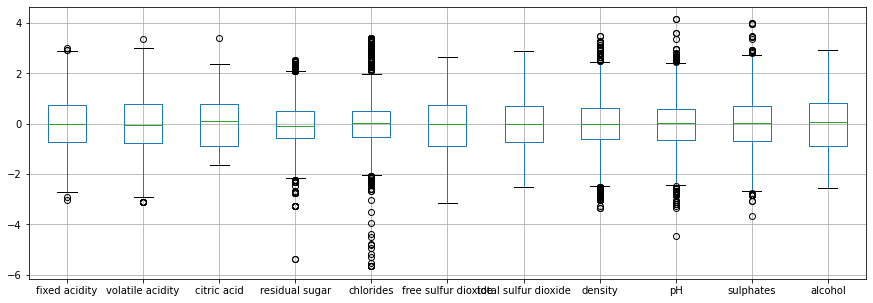

In [679]:
x.iloc[:,:].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [680]:
from scipy.stats import zscore
dfscore=np.abs(zscore(x))

print(np.where(dfscore>3))

(array([   7,   13,   17,   19,   42,   45,   45,   81,   83,   86,   91,
         92,   95,  106,  147,  151,  151,  151,  151,  169,  169,  170,
        181,  198,  226,  226,  240,  258,  281,  291,  440,  442,  451,
        469,  530,  535,  544,  554,  555,  557,  568,  614,  650,  656,
        692,  695,  695,  723,  730,  754,  773,  776,  777,  836,  836,
        837,  837,  889,  909,  914,  948,  949,  950, 1017, 1017, 1017,
       1018, 1018, 1018, 1051, 1114, 1165, 1260, 1287, 1299, 1316, 1316,
       1319, 1319, 1321, 1321, 1369, 1370, 1372, 1374, 1374, 1434, 1435,
       1470, 1558, 1605, 1630, 1720, 1788, 1875, 1875, 1891, 1917, 1917,
       1918, 1918, 1924, 1924, 2067, 2114, 2170, 2193, 2203, 2226, 2333,
       2348, 2350, 2390, 2442, 2449, 2569, 2662, 2670, 2714, 2729],
      dtype=int64), array([3, 9, 4, 4, 4, 0, 8, 4, 4, 9, 9, 9, 8, 4, 4, 2, 4, 8, 9, 4, 9, 9,
       4, 3, 4, 9, 4, 4, 4, 4, 8, 7, 4, 3, 5, 5, 8, 7, 7, 7, 4, 8, 8, 8,
       4, 4, 8, 9, 4, 4, 5, 4, 4, 4

In [681]:
dfnew=df[(dfscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (1526, 12)


df=print(np.where(dfscore<3))
df

dfnew=(dfscore<3)
dfnew

In [682]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [685]:
x=df.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [709]:
y=df.iloc[:,-1]
y.shape

(1526,)

In [687]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

In [688]:
maxAccu=0
maxRS=0
model=[lg,dtc]

for i in range(1,200):
    for m in model:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred=m.predict(x_test)
        acc=(accuracy_score(y_test,pred))
        #print(confusion_matrix(y_test,pred))
        #print(classification_report(y_test,pred))
        print(m,'accuracy',acc,'random_state',i)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
            print('max_accuracy',maxAccu,'max_random_state',i)
            
            

LogisticRegression() accuracy 0.8758169934640523 random_state 1
max_accuracy 0.8758169934640523 max_random_state 1
DecisionTreeClassifier() accuracy 0.8431372549019608 random_state 1
LogisticRegression() accuracy 0.8856209150326797 random_state 2
max_accuracy 0.8856209150326797 max_random_state 2
DecisionTreeClassifier() accuracy 0.8627450980392157 random_state 2
LogisticRegression() accuracy 0.8986928104575164 random_state 3
max_accuracy 0.8986928104575164 max_random_state 3
DecisionTreeClassifier() accuracy 0.8725490196078431 random_state 3
LogisticRegression() accuracy 0.8986928104575164 random_state 4
DecisionTreeClassifier() accuracy 0.8921568627450981 random_state 4
LogisticRegression() accuracy 0.8790849673202614 random_state 5
DecisionTreeClassifier() accuracy 0.9019607843137255 random_state 5
max_accuracy 0.9019607843137255 max_random_state 5
LogisticRegression() accuracy 0.8725490196078431 random_state 6
DecisionTreeClassifier() accuracy 0.8823529411764706 random_state 6
Logi

In [689]:
print('Best Accuracy is ', maxAccu, 'on random_state',maxRS)

Best Accuracy is  0.9379084967320261 on random_state 100


In [690]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [691]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [693]:
def models(x_train,y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    from sklearn.linear_model import LogisticRegression
    lg=LogisticRegression(random_state=0)
    lg.fit(x_train,y_train)
    
    
    from sklearn.svm import SVC
    svc=SVC(kernel='rbf',random_state=0)
    svc.fit(x_train,y_train)
    
    
    from sklearn.svm import SVC
    svc=SVC(kernel='linear',random_state=0)
    svc.fit(x_train,y_train)
    
    
    
    from sklearn.naive_bayes import GaussianNB
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    
    
    from sklearn.tree import DecisionTreeClassifier
    dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
    dtc.fit(x_train,y_train)
    
    
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rfc.fit(x_train,y_train)
    
    #print model accuracy on training data

    print("[0]KNeighbors Classifier Training Accuracy :" ,knn.score(x_train,y_train))
    print("[1]]Logistic Regression Training Accuracy :" ,lg.score(x_train,y_train))
    print("[2]SVC (rbf)Training Accuracy :" ,svc.score(x_train,y_train))
    print("[3]SVC (linear)Training Accuracy :" ,svc.score(x_train,y_train))
    print("[4]GaussianNB Training Accuracy :" ,gnb.score(x_train,y_train))
    print("[5]Decision Tree ClassifierTraining Accuracy :" ,dtc.score(x_train,y_train))
    print("[6]Random Forest Classifier Training Accuracy :" ,rfc.score(x_train,y_train))
    
    return knn,lg,svc,svc,gnb,dtc,rfc
    

In [694]:
model=models(x_train,y_train)

[0]KNeighbors Classifier Training Accuracy : 0.9073770491803279
[1]]Logistic Regression Training Accuracy : 0.8721311475409836
[2]SVC (rbf)Training Accuracy : 0.8745901639344262
[3]SVC (linear)Training Accuracy : 0.8745901639344262
[4]GaussianNB Training Accuracy : 0.8483606557377049
[5]Decision Tree ClassifierTraining Accuracy : 1.0
[6]Random Forest Classifier Training Accuracy : 0.9918032786885246


In [711]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [712]:
model=[lg,dtc,gnb,svc,knn,rfc]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

0.9281045751633987
[[271   9]
 [ 13  13]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       280
           1       0.59      0.50      0.54        26

    accuracy                           0.93       306
   macro avg       0.77      0.73      0.75       306
weighted avg       0.92      0.93      0.93       306

0.8888888888888888
[[256  24]
 [ 10  16]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       280
           1       0.40      0.62      0.48        26

    accuracy                           0.89       306
   macro avg       0.68      0.76      0.71       306
weighted avg       0.91      0.89      0.90       306

0.8594771241830066
[[245  35]
 [  8  18]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       280
           1       0.34      0.69      0.46        26

    accuracy                           0.86       306
  

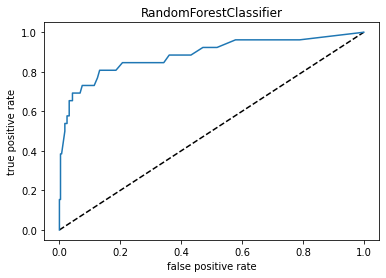

0.8857142857142859

In [713]:
pred_p=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s

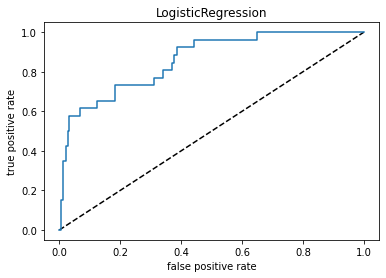

0.859065934065934

In [697]:
pred_p=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s

In [698]:
#HYPERPARAMETER TUNING

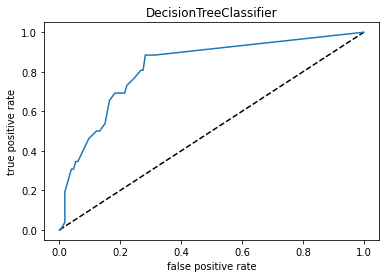

0.8236263736263737

In [699]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=1,min_samples_leaf=7)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
accuracy_score(y_test,pred)
pred_p=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_p)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_s=roc_auc_score(y_test,pred_p)
auc_s

# cross validation

In [700]:
score=cross_val_score(lg,x,y,cv=9)
print('cross validation score of Logistic Regression model :',score.mean())

cross validation score of Logistic Regression model : 0.8839965966662799


In [701]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86928105 0.78032787 0.86885246 0.81311475 0.86229508]
0.8387742419372121
0.035952696645078525


In [702]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8627451  0.81311475 0.86885246 0.8        0.87868852]
0.8446801671488267
0.031811640748495636


In [703]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8627451  0.86557377 0.86557377 0.86557377 0.86229508]
0.8643522982963677
0.001502745132362512


In [704]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88562092 0.68852459 0.8852459  0.75081967 0.86885246]
0.8158127075966999
0.08115876907599721


In [714]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87908497 0.85901639 0.88852459 0.84590164 0.88196721]
0.870898960677167
0.015913775224576338


# Grid search CV

In [705]:
parameters={"max_features":['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [706]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=7,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [707]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [708]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9444444444444444